# Pyber Analysis

In reviewing life to date (LTD) driving records for Pyber, the data indicate opportunity for growth in the suburban market. Surverying average fares across three city types (urban, suburban, and rural), average fare trends lower the more "urban" a city is. Though fares trend higher the more rural a city is, rural cities capture such a small market share (5.3% of rides) that increasing business would likely be a larger effort that would take more time to see returns. Suburban business, however, makes up a substantial portion of the fare business (30.5%) on fewer rides (26.3%). Compared to the urban business (62.7% of fares on 68.7% of rides), the suburban market stands out as more profitable. Viewed in this light, it might be advisable to focus marketing efforts toward growing suburban business.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_file = "data/city_data.csv"
ride_file = "data/ride_data.csv"

# Read the city file
city_raw = pd.read_csv(city_file)
city_raw.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
#read the ride file
ride_raw = pd.read_csv(ride_file)
ride_raw.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset
py_merge = pd.merge(ride_raw, city_raw, how="outer", on="city")

# Display the data table for preview
py_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
#build grouped DataFrame for clean data to populate plot
pyber_summ = pd.DataFrame(py_merge.groupby(['city', 'type', 'driver_count']).agg({'ride_id': 'nunique', 'fare':'mean'})).reset_index()
pyber_summ['type_key'] = ""
pyber_summ.loc[pyber_summ['type'].str.contains('Urban'), 'type_key'] = 'lightcoral'
pyber_summ.loc[pyber_summ['type'].str.contains('Suburban'), 'type_key'] = 'lightskyblue'
pyber_summ.loc[pyber_summ['type'].str.contains('Rural'), 'type_key'] = 'gold'
pyber_summ.head()

,city,type,driver_count,ride_id,fare,type_key
0,Amandaburgh,Urban,12,18,24.641667,lightcoral
1,Barajasview,Urban,26,22,25.332273,lightcoral
2,Barronchester,Suburban,11,16,36.422500,lightskyblue
3,Bethanyland,Suburban,22,18,32.956111,lightskyblue
4,Bradshawfurt,Rural,7,10,40.064000,gold


In [5]:
#create a DataFrame per city type on which to generate scatter plots
urban = pyber_summ.loc[pyber_summ['type'] == 'Urban']
suburban = pyber_summ.loc[pyber_summ['type'] == 'Suburban']
rural = pyber_summ.loc[pyber_summ['type'] == 'Rural']

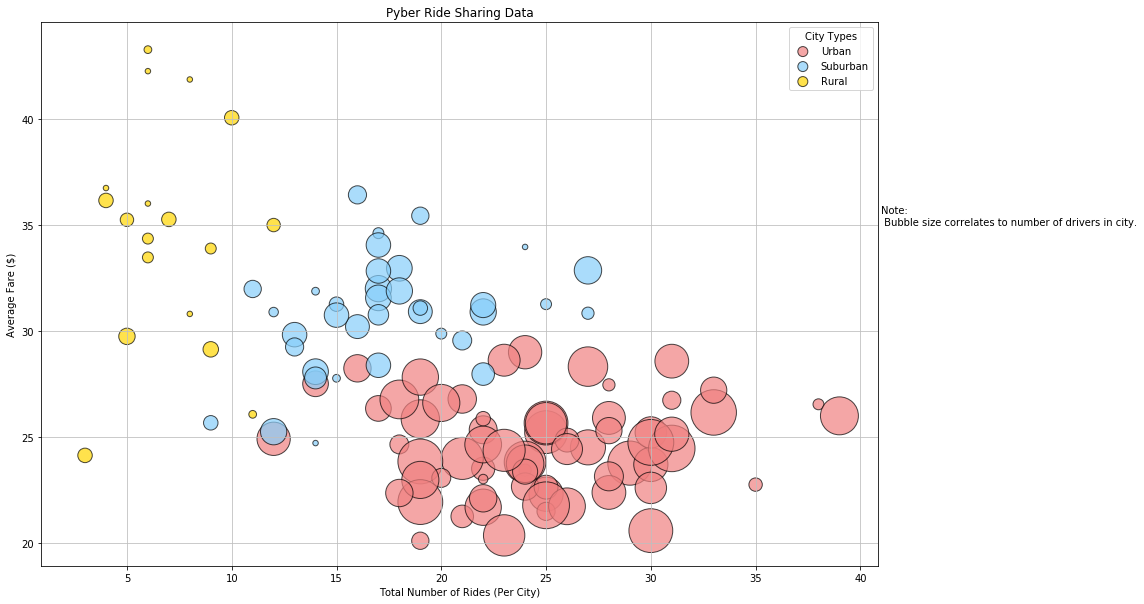

In [6]:
#build the scatter plot utilizing each DataFrame, in order to provide legend data
plt.figure(figsize = (15, 10))
plt.scatter(urban['ride_id'], urban['fare'], s=urban['driver_count']*30, c=urban['type_key'], edgecolors='k', alpha=0.7)
plt.scatter(suburban['ride_id'], suburban['fare'], s=suburban['driver_count']*30, c=suburban['type_key'], edgecolors='k', alpha=0.7)
plt.scatter(rural['ride_id'], rural['fare'], s=rural['driver_count']*30, c=rural['type_key'], edgecolors='k', alpha=0.7)

#add aesthetics and clarifying details
plt.grid(color="0.75", linestyle="-")
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(41, 35, "Note: \n Bubble size correlates to number of drivers in city.")

#add and format legend
leg = plt.legend(['Urban', 'Suburban', 'Rural'], title='City Types')
leg.legendHandles[0]._sizes = [100]
leg.legendHandles[1]._sizes = [100]
leg.legendHandles[2]._sizes = [100]

#save figure
plt.savefig('ride_share_avgs.jpg')
# show plot
plt.show()


## Total Fares by City Type

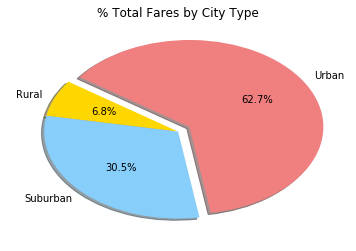

In [7]:
# create DataFrame storing fares on which the pie chart might be built
fare_sum = pd.DataFrame(py_merge.groupby('type').agg({'fare':'sum'})).reset_index()
fare_sum['type_key'] = ""
fare_sum.loc[fare_sum['type'].str.contains('Urban'), 'type_key'] = 'lightcoral'
fare_sum.loc[fare_sum['type'].str.contains('Suburban'), 'type_key'] = 'lightskyblue'
fare_sum.loc[fare_sum['type'].str.contains('Rural'), 'type_key'] = 'gold'

# Build Pie Chart
plt.pie(fare_sum['fare'],
        labels=fare_sum['type'],
        colors=fare_sum['type_key'], 
        autopct="%1.1f%%", 
        shadow=True,
        explode=[0, 0, .1], 
        startangle=145)
plt.title("% Total Fares by City Type")

#save figure
plt.savefig('fares_by_city_type.jpg')

# show plot
plt.show()

## Total Rides by City Type

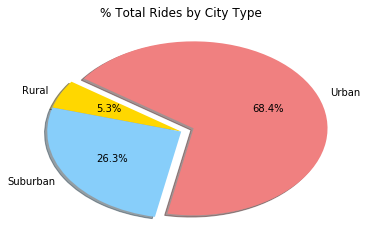

In [8]:
# create DataFrame storing ride id counts on which the pie chart might be built
ride_sum = pd.DataFrame(py_merge.groupby(['type']).agg({'ride_id':'nunique'})).reset_index()
ride_sum['type_key'] = ""
ride_sum.loc[ride_sum['type'].str.contains('Urban'), 'type_key'] = 'lightcoral'
ride_sum.loc[ride_sum['type'].str.contains('Suburban'), 'type_key'] = 'lightskyblue'
ride_sum.loc[ride_sum['type'].str.contains('Rural'), 'type_key'] = 'gold'

# Build Pie Chart
plt.pie(ride_sum['ride_id'],
        labels=ride_sum['type'],
        colors=ride_sum['type_key'], 
        autopct="%1.1f%%", 
        shadow=True,
        explode=[0, 0, .1], 
        startangle=145)
plt.title("% Total Rides by City Type")

#save figure
plt.savefig('fares_by_city_type.jpg')

# show plot
plt.show()

## Total Drivers by City Type

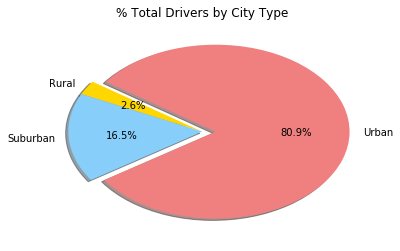

In [9]:
# create DataFrame storing driver counts on which the pie chart might be built
driver_sum = pd.DataFrame(city_raw.groupby('type').agg({'driver_count':'sum'})).reset_index()
driver_sum['type_key'] = ""
driver_sum.loc[driver_sum['type'].str.contains('Urban'), 'type_key'] = 'lightcoral'
driver_sum.loc[driver_sum['type'].str.contains('Suburban'), 'type_key'] = 'lightskyblue'
driver_sum.loc[driver_sum['type'].str.contains('Rural'), 'type_key'] = 'gold'

# Build Pie Chart
plt.pie(driver_sum['driver_count'],
        labels=ride_sum['type'],
        colors=ride_sum['type_key'], 
        autopct="%1.1f%%", 
        shadow=True,
        explode=[0, 0, .1], 
        startangle=145)
plt.title("% Total Drivers by City Type")

#save figure
plt.savefig('drivers_by_city_type.jpg')

# show plot
plt.show()